    March, 4th 2022

### **Mini exercise - Association**


*NB: Notebook ini tanpa narasi jawaban untuk tiap soal, hanya dicantumkan yang perlu dilakukan untuk menjawab tiap pertanyaan.*
<hr>

**Questions**

`1. Apakah mobil yang lebih mahal memiliki kecenderungan nilai pajaknya lebih tinggi juga? Bagaimana cara kamu mengidentifikasi dan menyimpulkan asosiasinya?`

`2. Jika berdasarkan dataset kamu ditanya "faktor apakah yang paling memengaruhi harga mobil bekas?", bagaimana kah kira-kira jawaban dan argumen awal kamu terkait pertanyaan tersebut?`

    Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.warnings.filterwarnings('ignore')

    Import datasets

In [2]:
df_audi = pd.read_csv(r'D:\Work\Batch\2022\JCDS 1602\MATERIALS\Notebooks\audi.csv')
df_toyota = pd.read_csv(r'D:\Work\Batch\2022\JCDS 1602\MATERIALS\Notebooks\toyota.csv')
df_hyundai = pd.read_csv(r'D:\Work\Batch\2022\JCDS 1602\MATERIALS\Notebooks\hyundi.csv')

In [3]:
df_cars = pd.read_csv(r'D:\Work\Batch\2022\JCDS 1602\MODULE 2\TM9_180222\all_cars.csv')

### **1.**

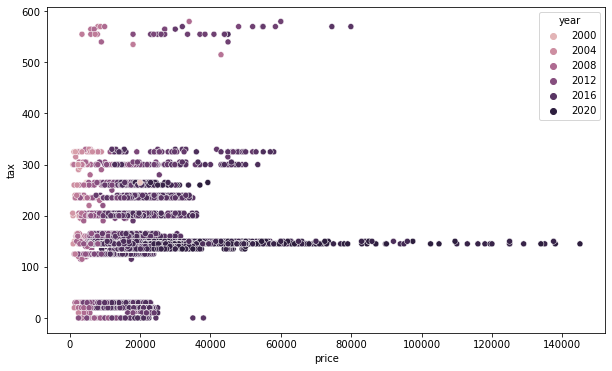

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='price', y='tax', data=df_cars, hue='year');

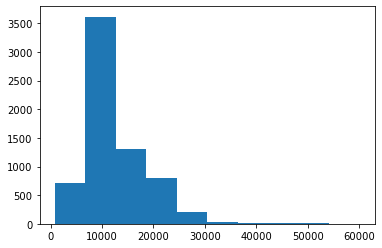

In [5]:
plt.hist(df_cars[df_cars['brand'] == 'Toyota']['price']);

In [6]:
from scipy.stats import shapiro

# normality test
toyota_price_dist = shapiro(df_cars[df_cars['brand'] == 'Toyota']['price']);

alpha = 0.05
p_value = toyota_price_dist[1]

if p_value <= alpha:
    print('Reject Ho, the samples are not drawn from normally distributed population.')
else:
    print('Fail to reject Ho, the samples are supposedly drawn from normally distributed population')

Reject Ho, the samples are not drawn from normally distributed population.


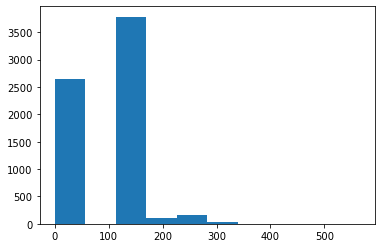

In [7]:
plt.hist(df_cars[df_cars['brand'] == 'Toyota']['tax']);

In [8]:
df_toyota[['price', 'tax']].corr(method='spearman')

,price,tax
price,1.000000,0.084378
tax,0.084378,1.000000


### **2**

In [29]:
brand_dict = {
    'Audi': 2,
    'Toyota': 1,
    'Hyundai': 3
}

df_cars_copy = df_cars.copy()
df_cars_copy['brand_id'] = df_cars_copy['brand'].apply(lambda x: brand_dict[x])
df_cars_copy

,Unnamed: 0,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand_id
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,2
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,2
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,2
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,2
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
22261,22261,Toyota,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,1
22262,22262,Toyota,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3,1
22263,22263,Toyota,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4,1
22264,22264,Toyota,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3,1


In [10]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22266 entries, 0 to 22265
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    22266 non-null  int64  
 1   brand         22266 non-null  object 
 2   model         22266 non-null  object 
 3   year          22266 non-null  int64  
 4   price         22266 non-null  int64  
 5   transmission  22266 non-null  object 
 6   mileage       22266 non-null  int64  
 7   fuelType      22266 non-null  object 
 8   tax           22266 non-null  int64  
 9   mpg           22266 non-null  float64
 10  engineSize    22266 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.9+ MB


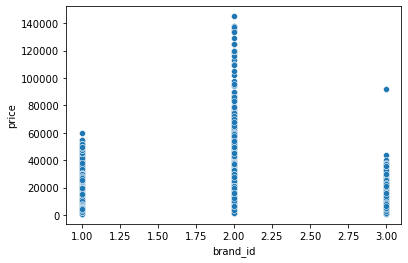

In [30]:
sns.scatterplot(x='brand_id', y='price', data=df_cars_copy);

In [27]:
df_hyundai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


In [31]:
df_cars_copy[['price', 'brand_id']].corr(method='spearman')

,price,brand_id
price,1.000000,0.103325
brand_id,0.103325,1.000000


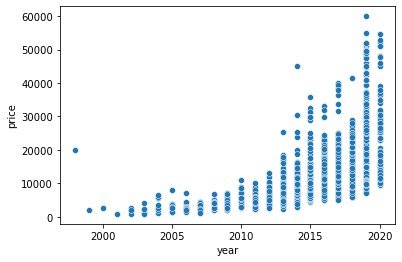

In [13]:
sns.scatterplot(x='year', y='price', data=df_toyota);

In [14]:
df_cars_copy[['price', 'year']].corr()

,price,year
price,1.000000,0.485282
year,0.485282,1.000000


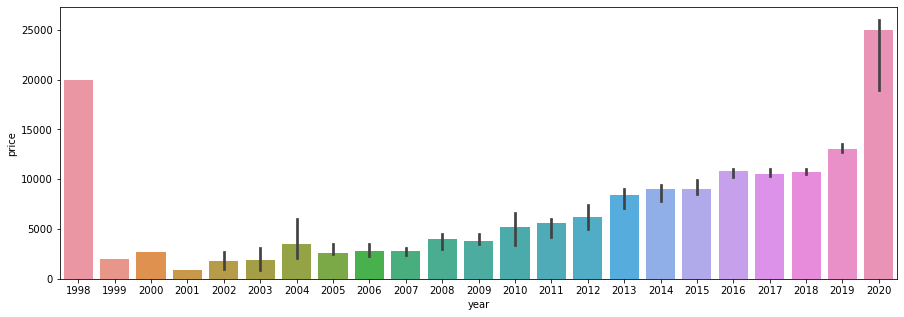

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x='year', y='price', data=df_toyota, estimator=np.median);

In [16]:
from scipy.stats import kruskal

alpha = 0.05
test_statistic, pvalue = kruskal(df_audi['price'], df_toyota['price'], df_hyundai['price'])


if pvalue <= alpha:
    print('Reject H0; there is at least one pair of car brands with significantly different prices')
else:
    print('Failed to reject H0; no significant difference of price between car brands')
    
# TODO: do post-hoc test to identify which pair(s) of brand has significant price difference

Reject H0; there is at least one pair of car brands with significantly different prices


<AxesSubplot:xlabel='transmission', ylabel='price'>

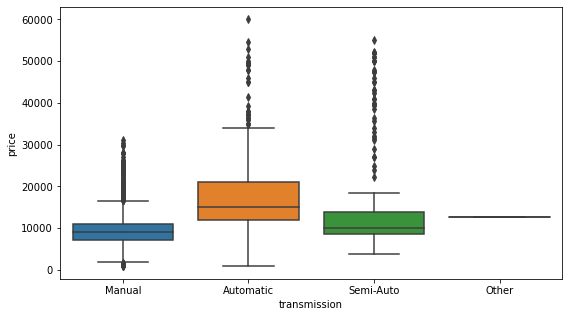

In [17]:
plt.figure(figsize=(9,5))
sns.boxplot(x='transmission', y='price', data=df_toyota)

In [18]:
from scipy.stats import kruskal

alpha = 0.05
test_statistic, pvalue = kruskal(
    df_toyota[df_toyota['transmission'] == 'Manual']['price'],
    df_toyota[df_toyota['transmission'] == 'Automatic']['price'],
    df_toyota[df_toyota['transmission'] == 'Semi-Auto']['price'],
)

print('Toyota cars only')
if pvalue <= alpha:
    print('Reject H0; there is at least one pair of car transmission with significantly different prices')
else:
    print('Failed to reject H0; no significant difference of price between car transmission')
    
# TODO: do post hoc test to identify which pair(s) of brand has significant price difference

Toyota cars only
Reject H0; there is at least one pair of car transmission with significantly different prices


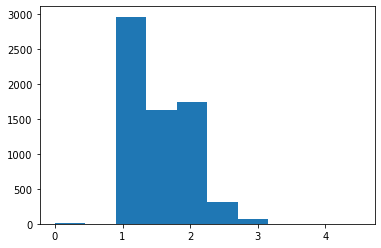

In [19]:
plt.hist(df_toyota['engineSize']);

In [20]:
df_toyota['engineSize'].value_counts()

1.0    2059
1.5    1423
1.8    1289
1.3     601
2.0     398
1.2     303
2.5     249
1.6     169
2.4      70
2.2      58
1.4      40
2.8      36
3.0      35
0.0       6
4.2       1
4.5       1
Name: engineSize, dtype: int64

In [21]:
df_toyota['engineSize'].mode()

0    1.0
dtype: float64

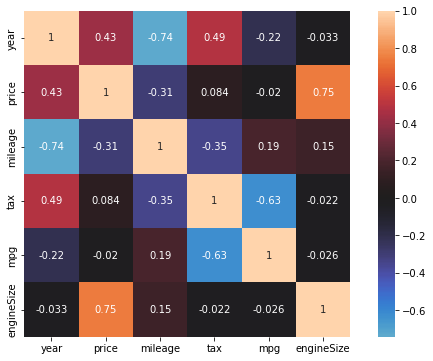

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_toyota.corr(method='spearman'), annot=True, square=True, center=0);